In [5]:
%load_ext autoreload
%autoreload 2
import sys, os, re
from pathlib import Path
# import current project
PROJ_PATH = Path(os.path.join(re.sub("EMA-IDS.*$", '', os.getcwd()), 'EMA-IDS'))
sys.path.append(str(PROJ_PATH))
# Set the project root directory to the working directory
os.chdir(str(PROJ_PATH))
from utils import dgl_read_data, read_json
import dgl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import dgl
from matplotlib.backends.backend_pdf import PdfPages

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### A scatter plot for each data set is generated separately

In [8]:
def plot_node_degree_distribution(dgl_graph, cmap_name='magma_r', edge_brightness_factor=0.7, output_path='node_degree_distribution.pdf', title = 'Node Degree Distribution (Scatter)'):
    """
    Plot a scatter plot of the node degree distribution and save it as a PDF file.

    Parameters:
        dgl_graph: DGLGraph object, the graph data structure
        cmap_name: str, the name of the color map, default is 'magma_r'
        edge_brightness_factor: float, the brightness factor for edge color, default is 0.7
        output_path: str, the path to save the PDF file, default is 'node_degree_distribution.pdf'
        title: figure title default is 'Node Degree Distribution (Scatter)'
    """

    # Custom function to adjust color brightness
    def adjust_color_brightness(color, factor=edge_brightness_factor):
        color = np.array(mcolors.to_rgb(color))
        return np.clip(color * factor, 0, 1)

    # Calculate the degree of the node
    in_degrees = dgl_graph.in_degrees().numpy()
    out_degrees = dgl_graph.out_degrees().numpy()
    total_degrees = in_degrees + out_degrees

    # Count the number of occurrences of each degree
    unique_degrees, counts = np.unique(total_degrees, return_counts=True)

    # Create a color map (using logarithmic normalization, the higher the frequency, the darker the color)
    norm = mcolors.LogNorm(vmin=min(counts), vmax=max(counts))
    cmap = plt.get_cmap(cmap_name)
    colors = cmap(norm(counts))

    # Adjust the border color to be slightly darker than the fill color
    edge_colors = [adjust_color_brightness(c, factor=edge_brightness_factor) for c in colors]

    # Draw scatter plots
    plt.figure(figsize=(10, 6))
    plt.scatter(unique_degrees, counts, color=colors, s=40, edgecolor=edge_colors, linewidths=0.2)
    plt.yscale('log')
    plt.xscale('log')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(True, which="both", ls="--")

    # Add color bar
    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])
    # plt.colorbar(sm, label='Frequency (Log Scale)')

    # Save as PDF file
    # plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()


datasets\NF-BoT-IoT_graph_binary.pkl


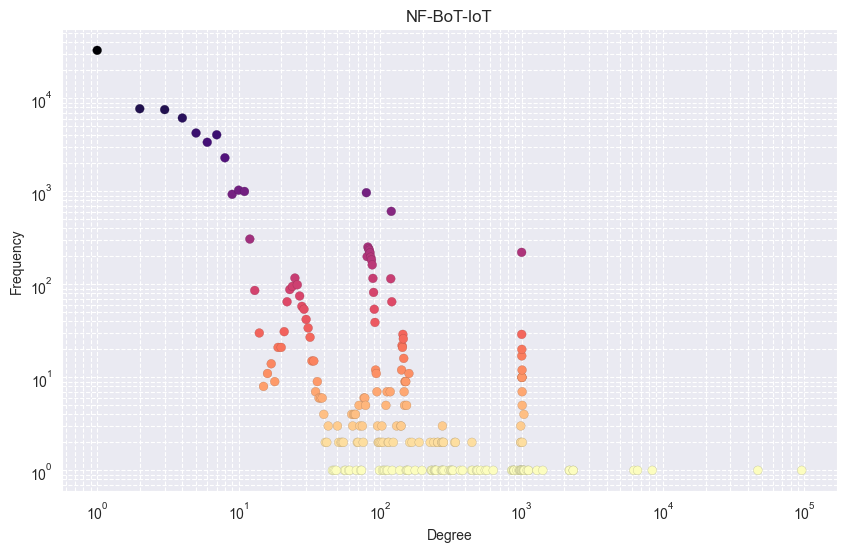

datasets\NF-CSE-CIC-IDS2018-v2_graph_multi.pkl


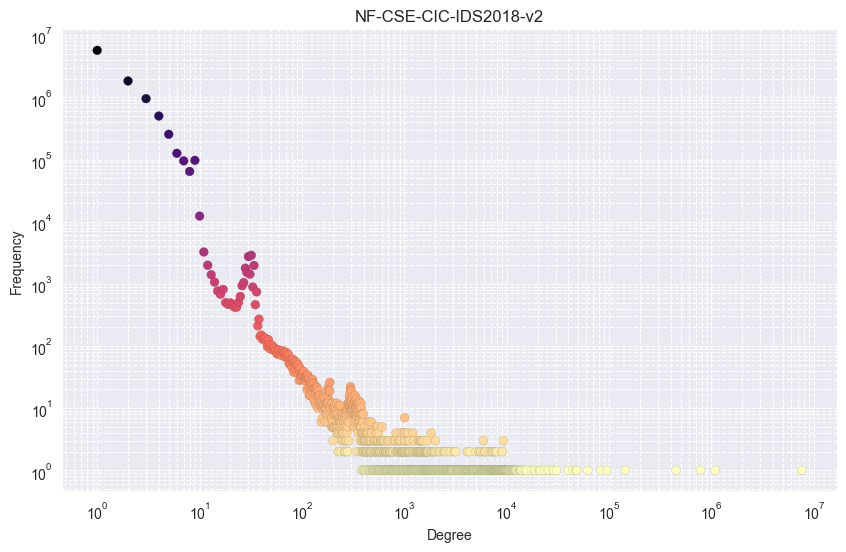

datasets\NF-ToN-IoT_graph_binary.pkl


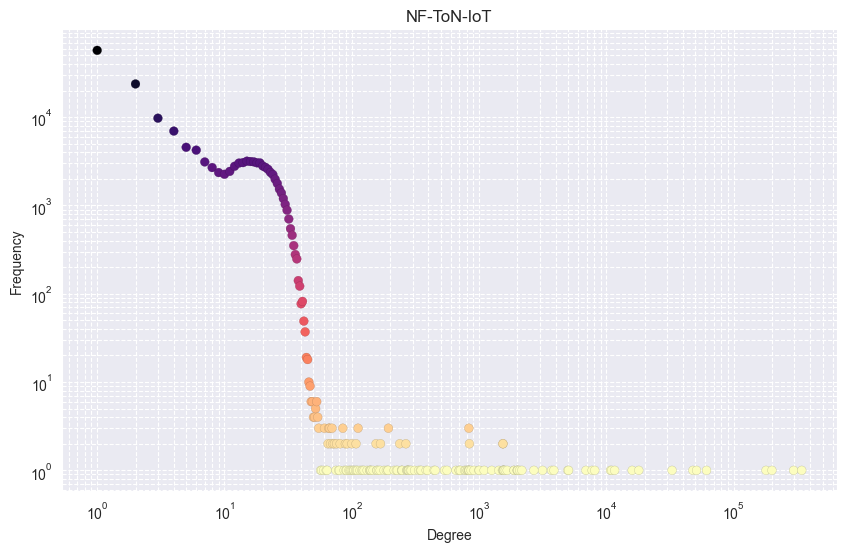

datasets\NF-UNSW-NB15-v2_graph_binary.pkl


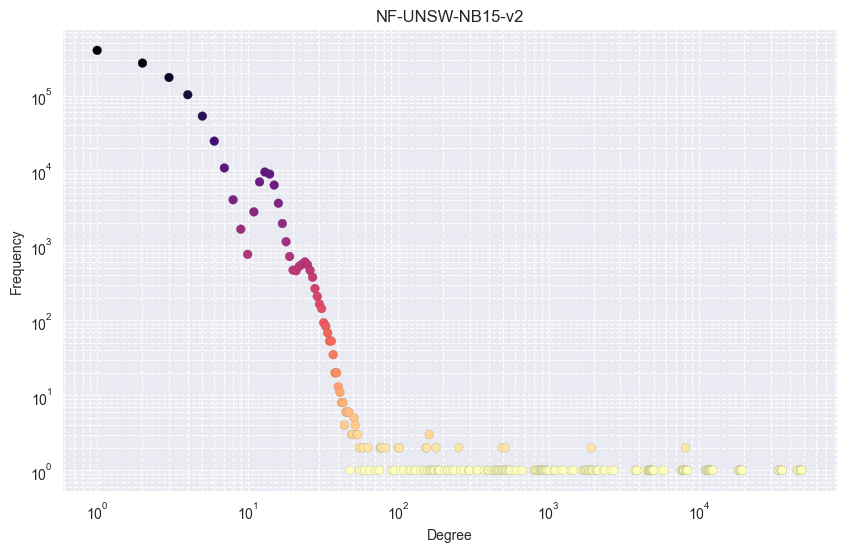

In [10]:
# Loop to generate a single scatter plot
dataset_names = ['nf_bot_binary', 'nf_cse_multi',  'nf_ton_binary', 'nf_unsw_binary']
# dataset_names = ['nf_bot_binary']

# Traverse each data set
for name in dataset_names:
    # Read data set information
    config_path = f'./config/{name}.json'
    config = read_json(config_path)
    n_features, edge_index, edge_attr, y, e_label, e_ids = dgl_read_data(config)

    # Build diagram
    dgl_graph = dgl.graph((edge_index[0], edge_index[1]))
    dgl_graph.edata['h'] = edge_attr
    dgl_graph.ndata['h'] = n_features
    dgl_graph.edata['label'] = e_label

    dataset_name = config['ds_name'].split('_')[0]
    # Define the output file path
    output_path = f'node_degree_distribution_{dataset_name}.pdf'

    # Call function drawing
    plot_node_degree_distribution(dgl_graph, cmap_name='magma_r', output_path=output_path, title=dataset_name)


#### Get the graph information after the data set composition

In [12]:

def get_graph_info(dgl_graph):
    # Get the number of nodes
    num_nodes = dgl_graph.num_nodes()

    # Get the number of edges
    num_edges = dgl_graph.num_edges()

    # Get in and out
    # in_degrees = dgl_graph.in_degrees().tolist()  # 入度
    # out_degrees = dgl_graph.out_degrees().tolist()  # 出度

    # Compute node feature dimensions
    node_feature_dim = dgl_graph.ndata['h'].shape[1] if 'h' in dgl_graph.ndata else None

    # Calculate the edge feature dimension
    edge_feature_dim = dgl_graph.edata['h'].shape[1] if 'h' in dgl_graph.edata else None

    # Calculate the label dimension
    # edge_feature_dim = dgl_graph.edata['label'].shape[1] if 'label' in dgl_graph.edata else None

    # Output information
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    # print(f"In-degrees: {in_degrees}")
    # print(f"Out-degrees: {out_degrees}")
    print(f"Node feature dimension: {node_feature_dim}")
    print(f"Edge feature dimension: {edge_feature_dim}")


In [13]:
tasks = ['nf_bot_binary', 'nf_bot_multi', 'nf_cse_binary', 'nf_cse_multi',  'nf_ton_binary', 'nf_ton_multi', 'nf_unsw_binary','nf_unsw_multi']
# tasks = ['nf_cse_multi',  'nf_ton_binary', 'nf_ton_multi', 'nf_unsw_binary','nf_unsw_multi']
# Walk through each dataset
for name in tasks:
    # Read data set information
    config_path = f'./config/{name}.json'
    config = read_json(config_path)
    n_features, edge_index, edge_attr, y, e_label, e_ids = dgl_read_data(config)

    # Build diagram
    dgl_graph = dgl.graph((edge_index[0], edge_index[1]))
    dgl_graph.edata['h'] = edge_attr
    dgl_graph.ndata['h'] = n_features
    dgl_graph.edata['label'] = e_label
    print(name)
    get_graph_info(dgl_graph)

datasets\NF-BoT-IoT_graph_binary.pkl
nf_bot_binary
Number of nodes: 77177
Number of edges: 600100
Node feature dimension: 8
Edge feature dimension: 8
datasets\NF-BoT-IoT_graph_multi.pkl
nf_bot_multi
Number of nodes: 77177
Number of edges: 600100
Node feature dimension: 32
Edge feature dimension: 8
datasets\NF-CSE-CIC-IDS2018-v2_graph_binary.pkl
nf_cse_binary
Number of nodes: 9686040
Number of edges: 18893708
Node feature dimension: 8
Edge feature dimension: 39
datasets\NF-CSE-CIC-IDS2018-v2_graph_multi.pkl
nf_cse_multi
Number of nodes: 9686040
Number of edges: 18893708
Node feature dimension: 112
Edge feature dimension: 39
datasets\NF-ToN-IoT_graph_binary.pkl
nf_ton_binary
Number of nodes: 169562
Number of edges: 1379274
Node feature dimension: 8
Edge feature dimension: 8
datasets\NF-ToN-IoT_graph_multi.pkl
nf_ton_multi
Number of nodes: 169562
Number of edges: 1379274
Node feature dimension: 72
Edge feature dimension: 8
datasets\NF-UNSW-NB15-v2_graph_binary.pkl
nf_unsw_binary
Number of

# Generate a combined scatter plot of four data sets

datasets\NF-BoT-IoT_graph_binary.pkl
datasets\NF-ToN-IoT_graph_binary.pkl
datasets\NF-CSE-CIC-IDS2018-v2_graph_multi.pkl
datasets\NF-UNSW-NB15-v2_graph_binary.pkl


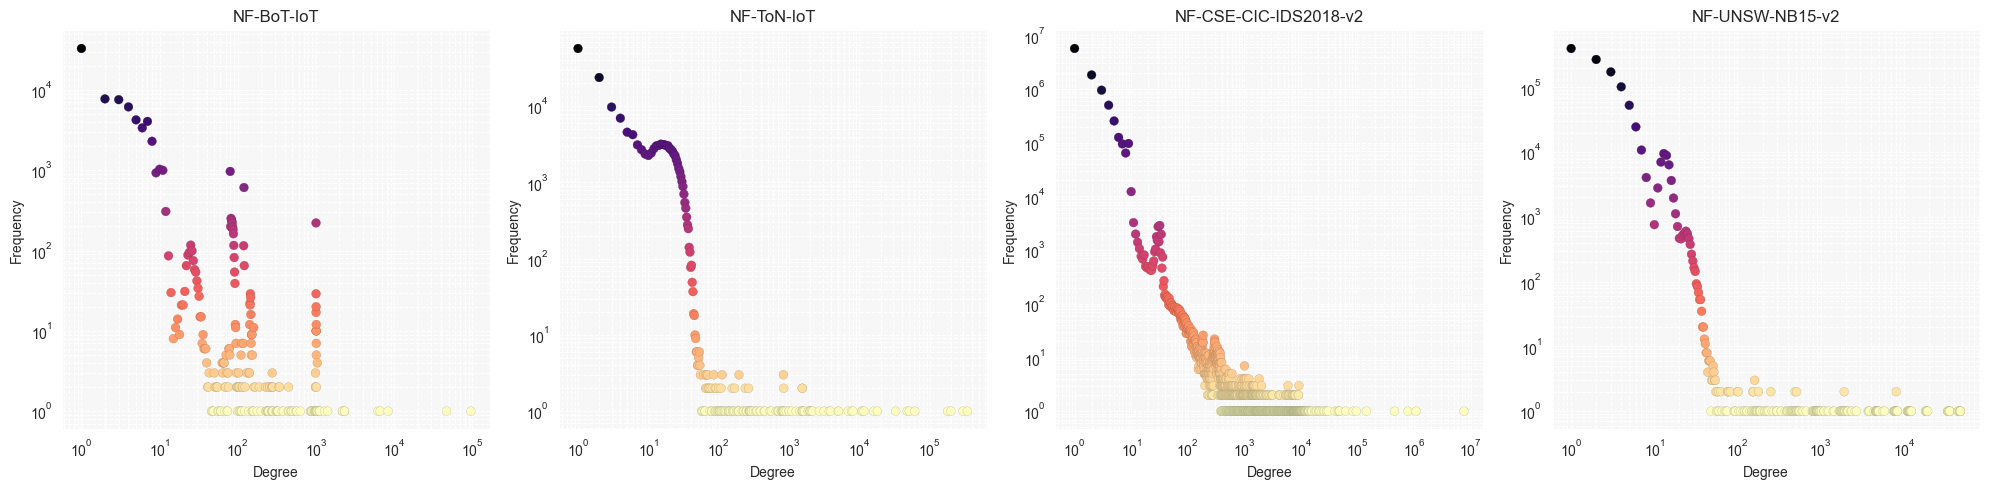

PDF file saved to combined_node_degree_distribution.pdf


In [15]:
def plot_node_degree_distribution(ax, dgl_graph, cmap_name='magma_r', edge_brightness_factor=0.7, title='Node Degree Distribution'):
    """
    Plot a scatter plot of the node degree distribution on the given subplot ax.

    Parameters:
        ax: Matplotlib subplot object
        dgl_graph: DGLGraph object, the graph data structure
        cmap_name: str, the name of the color map, default is 'magma_r'
        edge_brightness_factor: float, the brightness factor for edge color, default is 0.7
        title: str, the title of the plot
    """

    # Custom function to adjust color brightness
    def adjust_color_brightness(color, factor=edge_brightness_factor):
        color = np.array(mcolors.to_rgb(color))
        return np.clip(color * factor, 0, 1)

    # Calculate the degree of the node
    in_degrees = dgl_graph.in_degrees().numpy()
    out_degrees = dgl_graph.out_degrees().numpy()
    total_degrees = in_degrees + out_degrees

    # Count the number of occurrences of each degree
    unique_degrees, counts = np.unique(total_degrees, return_counts=True)

    # Create a color map (using logarithmic normalization, the higher the frequency, the darker the color)
    norm = mcolors.LogNorm(vmin=min(counts), vmax=max(counts))
    cmap = plt.get_cmap(cmap_name)
    colors = cmap(norm(counts))

    # Adjust the border color to be slightly darker than the fill color
    edge_colors = [adjust_color_brightness(c, factor=edge_brightness_factor) for c in colors]

    # Set the background color
    ax.set_facecolor('#f7f7f7') # 浅灰色 f7f7f7 白灰色 f0f0f0 浅灰色 fafafa

    # Draw scatter plots
    ax.scatter(unique_degrees, counts, color=colors, s=40, edgecolor=edge_colors, linewidths=0.2, zorder=3)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(title)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')

    ax.grid(True, which="both", color='white', ls="--", zorder=1)

# datasets
dataset_names = ['nf_bot_binary', 'nf_ton_binary', 'nf_cse_multi', 'nf_unsw_binary']

# Create a PDF file
output_pdf_path = 'combined_node_degree_distribution.pdf'
with PdfPages(output_pdf_path) as pdf:
    # Create a graph with 4 subgraphs
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    # Set the outer area background to white
    fig.patch.set_facecolor('white')
    # Go through each data set and plot
    for i, name in enumerate(dataset_names):
        # Read data set information
        config_path = f'./config/{name}.json'
        config = read_json(config_path)
        n_features, edge_index, edge_attr, y, e_label, e_ids = dgl_read_data(config)

        # Build diagram
        dgl_graph = dgl.graph((edge_index[0], edge_index[1]))
        dgl_graph.edata['h'] = edge_attr
        dgl_graph.ndata['h'] = n_features
        dgl_graph.edata['label'] = e_label

        dataset_name = config['ds_name'].split('_')[0]
        title = f'{dataset_name}'

        # Draw an image of the current dataset in a subgraph
        plot_node_degree_distribution(axs[i], dgl_graph, cmap_name='magma_r', title=title)

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Save graphic as PDF
    # pdf.savefig(fig, bbox_inches='tight')

    plt.show()
    plt.close(fig)

print(f'PDF file saved to {output_pdf_path}')
